# Curva de Bézier



In [7]:
def plotBezierCurve(polys, points, name):
    x = var('t')
    a = plot([],figsize=(8, 8),title=name)
    for i in range(len(polys)): # Plots parametric polynomials
        p = polys[i]
        a += parametric_plot([p[0], p[1]], (x, p[2], p[2] + 1), color = 'red')
    for i in range(len(points) - 1): # Plots shape of points' polygon
        j = (i + 1) % len(points)
        p = [points[i][0] * t + points[j][0] * (1 - t), points[i][1] * t + points[j][1] * (1 - t),0]
        a += parametric_plot([p[0], p[1]], (x, p[2], p[2] + 1), color = 'blue')
    show(a)

In [8]:
def Bezier(points): # 2D Bézier Curve for points in list "points"
    n = len(points) - 1
    # Preprocess binom(n, i) for all i = 0, ..., n O(n^2)
    # Uses property C(n, k) = C(n - 1, k - 1) + C(n - 1, k)
    # And memory saving for Dynamic Programming
    C = [0 for i in range(n + 1)]
    new_C = [0 for i in range(n + 1)]
    C[0] = C[1] = 1
    i = 2
    while i <= n:
        new_C[0] = new_C[i] = 1
        j = 1
        while j < i:
            new_C[j] = C[j - 1] + C[j]
            j += 1
        for j in range(i + 1):
            C[j] = new_C[j]
        i += 1
    # Preprocessing Bernstein Polynomials O(n^3)
    var('t')
    polys = [1 for i in range(n + 1)]
    prefix = 1
    for i in range(n + 1):
        polys[i] *= C[i] * prefix
        prefix *= t
    prefix = 1
    for i in range(n, -1, -1):
        polys[i] *= prefix
        prefix *= (1 - t)
    # Multiplying by each point and adding to parametric O(n^2)
    P = [0 for i in range(3)]
    for i in range(n + 1):
        for j in range(2):
            P[j] += polys[i] * points[i][j]
    plotBezierCurve([P], points, "Curva de Bezier")

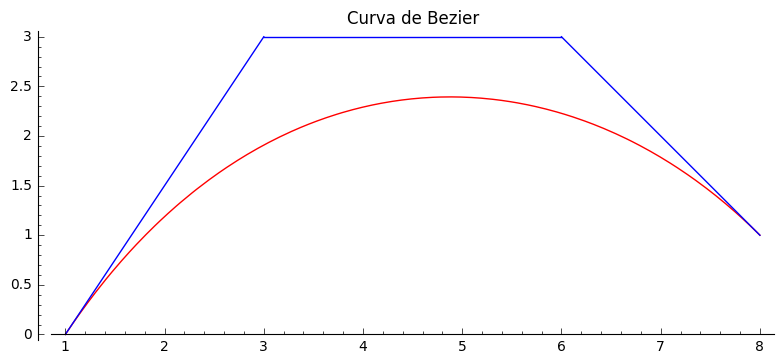

In [9]:
Bezier([(1, 0), (3, 3), (6, 3), (8, 1)])

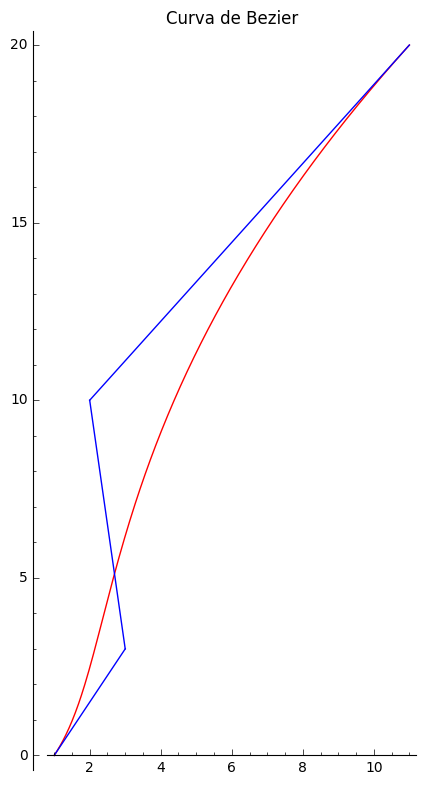

In [10]:
Bezier([(1, 0), (3, 3), (2, 10), (11, 20)])

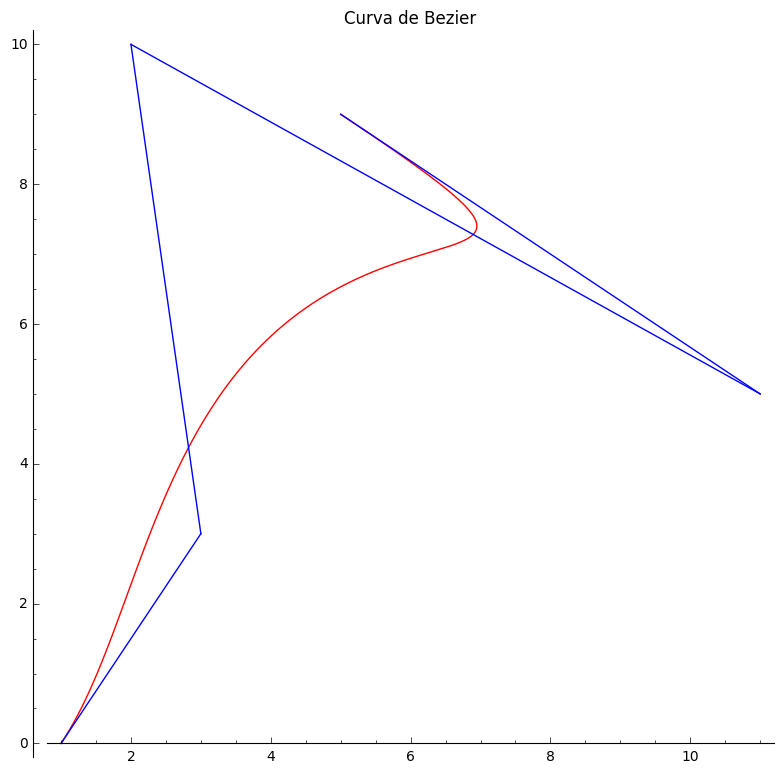

In [12]:
Bezier([(1, 0), (3, 3), (2, 10), (11, 5), (5, 9)])